#

In [1]:
%matplotlib inline

import numpy as np
import pylab as plt
import matplotlib as mpl
from py4xs.local import ExpPara
from py4xs.data2d import Data2d,Axes2dPlot,DataType
import warnings

warnings.filterwarnings('ignore')

<br>
## Setting up the ExpPara for the detector
The detector rotation angles are defined as described in [DOI:10.1107/S0909049512048984](https://scripts.iucr.org/cgi-bin/paper?co5025)
<br>
The rotation of the detector can be defined by three different angles, as long as the rotation matrix is revised accordingly.

In [2]:
ew = ExpPara(1042, 1042)
ew.wavelength = 0.886
ew.bm_ctr_x = 27 
ew.bm_ctr_y = 1039 
ew.ratioDw = 2.52
ew.det_orient = 45
ew.det_tilt = -17
ew.det_phi = 0
ew.grazing_incident = True  
ew.flip = -3
ew.incident_angle = 0.6   
ew.sample_normal = 0.25     

ew.calc_rot_matrix()
ew.init_coordinates()

<br>
## Reading the data from TIF files 
Clean up the background a bit before displaying the data

In [3]:
gid_file = 'data/no36_500A_PTCDI_Td_RT-Ta_140C-ODTS-sth0.60.60s_WAXS'
xr_file = 'data/no36_500A_PTCDI_Td_RT-Ta_140C-ODTS-sth_-0.5_10-attn0.5_42s_WAXS'
bkg_file = 'data/no83_bare_Si-sth0.60.60s_WAXS'

dbkg = Data2d(bkg_file, exp=ew)
dbkg.data.d = (dbkg.data.d-1000)*15/10

dwaxs = Data2d(gid_file, exp=ew)
dwaxs.data.d = np.abs(dwaxs.data.d-dbkg.data.d-850)
dwaxs.conv_Iqrqz(Nqr=480, Nqz=480)

<br>
## Displaying the data using Axes2dPlot
The scattering pattern as collected

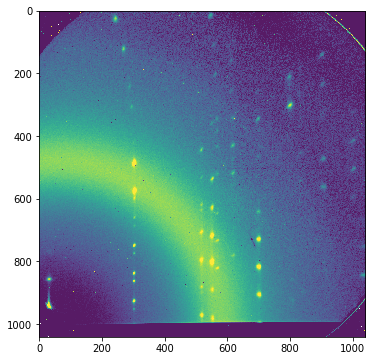

In [7]:
plt.figure(figsize=(6,6))
ax = plt.gca()
paxr = Axes2dPlot(ax, dwaxs.data)
paxr.plot(logScale=True)
paxr.img.set_clim(240,2400)

<br>
## 
The scattering data after translated to qr-qz coordinates

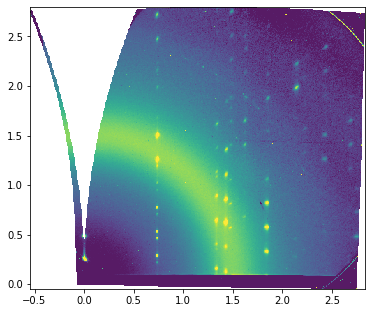

In [8]:
plt.figure(figsize=(6,6))
ax = plt.gca()
paxq = Axes2dPlot(ax, dwaxs.qrqz_data, DataType.qrqz)
paxq.plot(logScale=True)
paxq.img.set_clim(240,2400)